In [2]:
#Import different libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
#Loading the files into dataframes
species = pd.read_csv("species_info.csv")
observations = pd.read_csv("observations.csv")
#Getting the info of each dataframe
species.info()
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [3]:
#Exploration of species dataframe with head
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [4]:
#Exploration of observations dataframe with head
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [5]:
#Obtention of the different conservation statuses available
species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [6]:
#Obtaining the number of species from each dataframe
#Number of species from the species dataframe
species.scientific_name.nunique()

5541

In [7]:
#Obtaining the number of species from the observations dataframe
observations.scientific_name.nunique()

5541

In [8]:
#Obtaining the value counts of the species according to their conservation status
species.conservation_status.value_counts()

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

In [9]:
species.conservation_status = species.conservation_status.fillna("Safe")
species.conservation_status.unique()

array(['Safe', 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

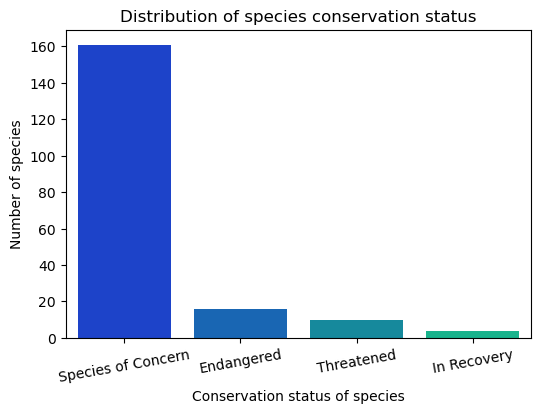

<Figure size 640x480 with 0 Axes>

In [31]:
#Obtaining the distribution of conservation statuses
species_2 = species[species.conservation_status != "Safe"]
plt.figure(figsize=(6, 4))
sns.countplot(x="conservation_status", data=species_2, palette="winter")
plt.xlabel("Conservation status of species")
plt.ylabel("Number of species")
plt.title("Distribution of species conservation status")
ax = plt.subplot()
ax.set_xticklabels(["Species of Concern", "Endangered", "Threatened", "In Recovery"], rotation=10)
plt.show()
plt.clf()


In [11]:
#Obtaining the value counts of the different categories of living beings in the species dataframe
species.category.value_counts()

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64

In [12]:
#Checking the number and names of National parks in the observations dataframe
print(observations.park_name.nunique())
observations.park_name.unique()

4


array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

In [13]:
#Number of total observations in all 4 National parks
print("The total number of observations in the last 7 days in all 4 parks is " + str(observations.observations.sum()) + " observations")

The total number of observations in the last 7 days in all 4 parks is 3314739 observations


In [14]:
#Making a table of counts of the different conservation statuses vs different categories of species
conservation_vs_category = species[species.conservation_status != "Safe"]\
.groupby(["conservation_status", "category"])['scientific_name'].count().unstack()
print(conservation_vs_category)

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                 1.0   4.0   3.0     7.0                NaN   
In Recovery                NaN   3.0   NaN     1.0                NaN   
Species of Concern         4.0  72.0   4.0    28.0                5.0   
Threatened                 2.0   NaN   4.0     2.0                NaN   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered               NaN             1.0  
In Recovery              NaN             NaN  
Species of Concern       5.0            43.0  
Threatened               NaN             2.0  


In [15]:
#Determine the distribution of conservation statuses among categories
species.category.unique()
categories = species.category.unique().tolist()
categories

['Mammal',
 'Bird',
 'Reptile',
 'Amphibian',
 'Fish',
 'Vascular Plant',
 'Nonvascular Plant']

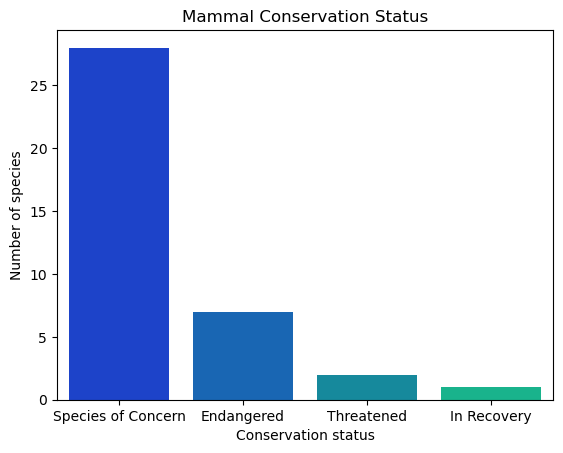

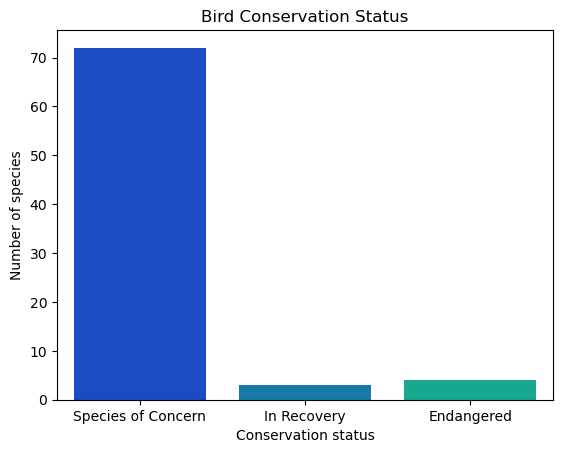

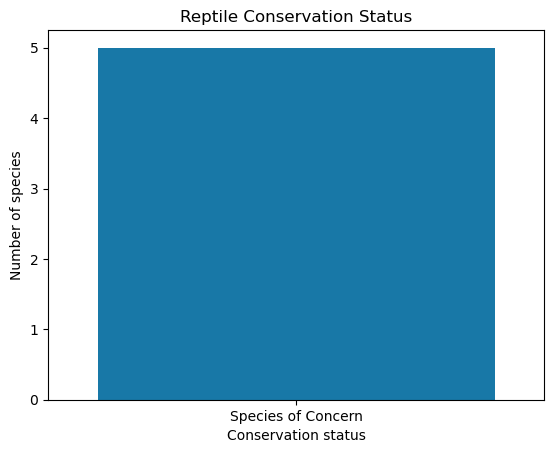

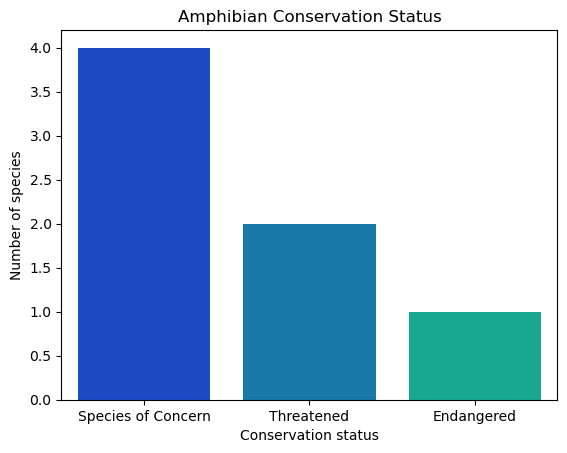

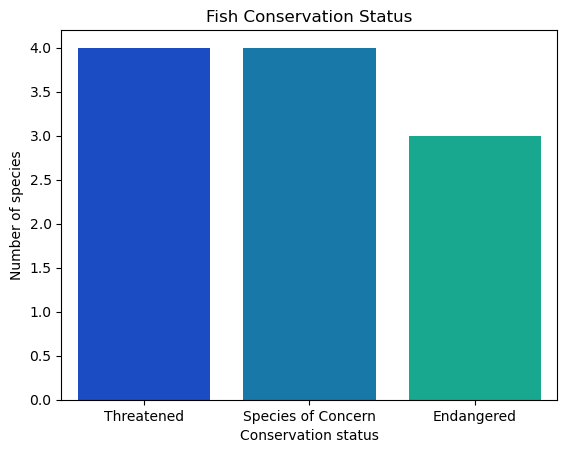

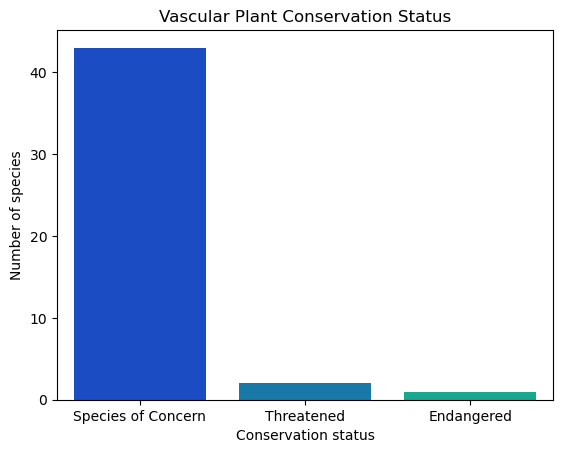

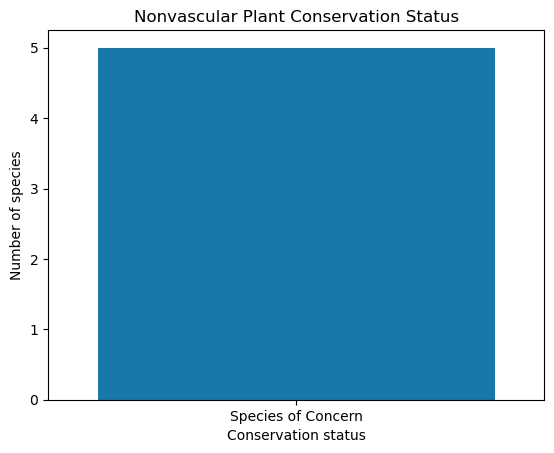

<Figure size 640x480 with 0 Axes>

In [16]:
#Plot conservation statuses for each category
for i in categories:
    dataframe = species_2[species_2.category == i]
    sns.countplot(x="conservation_status", data = dataframe, palette = "winter")
    plt.xlabel("Conservation status")
    plt.ylabel("Number of species")
    plt.title(i + " Conservation Status")
    plt.show()
    plt.clf()

<Figure size 400x200 with 0 Axes>

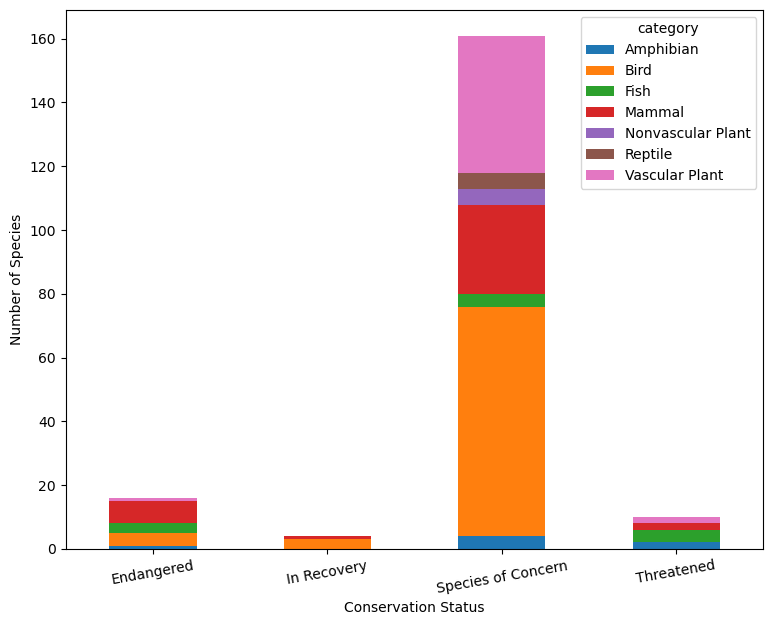

<Figure size 640x480 with 0 Axes>

In [37]:
#Creating a stacked bar chart of 
plt.figure(figsize=(4,2))
ax = conservation_vs_category.plot(kind = 'bar', figsize=(9,7), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")
plt.xticks(rotation=10)
plt.show()
plt.clf()

In [18]:
#Let´s analyze the what species are more endangered
species["need_protection"] = species["conservation_status"] != "Safe"
categories_counts = species.groupby(["category", "need_protection"])["scientific_name"].nunique().unstack()
categories_counts

need_protection,False,True
category,,
Amphibian,72,7
Bird,413,75
Fish,115,11
Mammal,146,30
Nonvascular Plant,328,5
Reptile,73,5
Vascular Plant,4216,46


In [19]:
#Let´s add a percentege column
categories_counts["% Protected"] = categories_counts[True] / \
(categories_counts[False] + categories_counts[True]) * 100
categories_counts.rename(columns={False:"Not Protected", True:"Protected"}, inplace=True)
categories_counts

need_protection,Not Protected,Protected,% Protected
category,,,
Amphibian,72,7,8.860759
Bird,413,75,15.368852
Fish,115,11,8.730159
Mammal,146,30,17.045455
Nonvascular Plant,328,5,1.501502
Reptile,73,5,6.410256
Vascular Plant,4216,46,1.079305


In [20]:
#Correlation - Statistical significance between Mammals-Reptiles
#P-value is 0.038. Therefore there is a correlation between the conservation statuses of both categories
contingency_mammals_reptiles = [[30,146], [5,73]]
chi2_contingency(contingency_mammals_reptiles)

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))

In [21]:
#Correlation - Statistical significance between Amphibian-Fish
#P-value is 1. Both variables are independent
contingency_amphibians_fish = [[7, 72], [11,115]]
chi2_contingency(contingency_amphibians_fish)

(0.0,
 1.0,
 1,
 array([[  6.93658537,  72.06341463],
        [ 11.06341463, 114.93658537]]))

In [22]:
#Spotting the species most found at every Park
parks_list = observations.park_name.unique().tolist()
parks_list
merged_df = observations.merge(species, on='scientific_name', how='left')
for i in parks_list:
    park = merged_df[merged_df.park_name == i].sort_values(by="observations", ascending=False).reset_index()
    park_table = park.head().drop(["index", "conservation_status", "need_protection", "park_name"], axis=1)
    print("The most prevalent species at " + i + " are:")
    print(park_table)
    

The most prevalent species at Great Smoky Mountains National Park are:
            scientific_name  observations        category  \
0  Sonchus asper ssp. asper           147  Vascular Plant   
1        Lespedeza violacea           146  Vascular Plant   
2      Botrychium dissectum           144  Vascular Plant   
3          Festuca subulata           141  Vascular Plant   
4         Branta hutchinsii           139            Bird   

                                common_names  
0                           Spiny Sowthistle  
1                         Violet Bush-Clover  
2  Cutleaf Grape-Fern, Cut-Leaved Grape Fern  
3             Bearded Fescue, Nodding Fescue  
4                             Cackling Goose  
The most prevalent species at Yosemite National Park are:
                      scientific_name  observations        category  \
0     Ivesia shockleyi var. shockleyi           223  Vascular Plant   
1                Lipocarpha micrantha           222  Vascular Plant   
2        

In [23]:
#Conclusions 
#The first conclusión is that only 191 species of a total of 5541 need an intervention, which is a small proportion. There is great work in the US National Parks System.
#The total number of different species is 5541.
#Among the species that need an intervention, 161 are of concern, 16 are endangered, 10 are threatened and only 4 in recovery.
#The category with the higher number of species is vascular plants, whereas the reptiles category only possess 79 species
#Observations were performed in 4 different Parks: Great Smoky Mountains National Park, Yosemite National Park, Bryce National Park and Yellowstone National Park.
#The total number of observations performed in all 4 parks is 3, 314, 739.
#The most endangered category of living beings in all 4 parks is mammals, followed by birds.
#The category of species with more observations at each park are the vascular plants.
